# **Smart Healthcare Assistant for Disease Prediction and Management**
  Description: Develop a healthcare assistant that uses patient data and medical history to predict disease risk and recommend preventive measures. Leveraging deep learning and predictive analytics, this assistant could analyze various health metrics (like blood pressure, heart rate, glucose levels) combined with demographics to anticipate potential illnesses. Integrate Explainable AI (XAI) for transparency so healthcare providers understand how predictions are made, making the system more trustable for doctors and patients alike.


The procedure to perform this is :

Data preprocessing

A deep learning model with TensorFlow/Keras

Prediction

SHAP explainability

In [3]:
!pip install pandas numpy scikit-learn tensorflow shap matplotlib

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7360 - loss: 0.5802 - val_accuracy: 0.7875 - val_loss: 0.5441
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7884 - loss: 0.5194 - val_accuracy: 0.8125 - val_loss: 0.5092
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7837 - loss: 0.4996 - val_accuracy: 0.8375 - val_loss: 0.4740
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8450 - loss: 0.4441 - val_accuracy: 0.8375 - val_loss: 0.4426
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8234 - loss: 0.4526 - val_accuracy: 0.8625 - val_loss: 0.4138
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8567 - loss: 0.3974 - val_accuracy: 0.8625 - val_loss: 0.3877
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8561 - loss: 0.3667 - val_accuracy: 0.8875 - val_loss: 0.3636
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8633 - loss: 0.3476 - val_accuracy: 0.8750 - val_loss: 0.3411
Ep

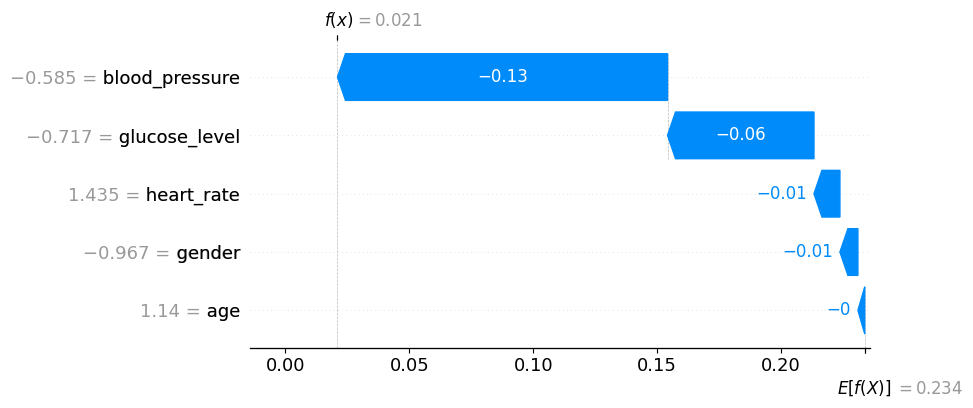

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import shap
import matplotlib.pyplot as plt

# Step 1: Simulate patient data
def generate_data(n=1000):
    np.random.seed(42)
    data = pd.DataFrame({
        'age': np.random.randint(20, 80, n),
        'gender': np.random.choice([0, 1], n),  # 0: Female, 1: Male
        'blood_pressure': np.random.normal(120, 15, n),
        'heart_rate': np.random.normal(72, 10, n),
        'glucose_level': np.random.normal(100, 30, n),
    })
    # Simulated condition: high BP or glucose likely leads to disease
    data['disease_risk'] = ((data['blood_pressure'] > 135) | (data['glucose_level'] > 140)).astype(int)
    return data

# Step 2: Load and prepare data
data = generate_data()
X = data.drop('disease_risk', axis=1)
y = data['disease_risk']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Build the deep learning model
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

# Step 4: Predict disease risk
def predict_risk(patient_data):
    df = pd.DataFrame([patient_data])
    df_scaled = scaler.transform(df)
    prediction = model.predict(df_scaled)[0][0]
    return round(prediction, 2)

# Example patient
example_patient = {
    'age': 55,
    'gender': 1,
    'blood_pressure': 150,
    'heart_rate': 80,
    'glucose_level': 160
}

risk_score = predict_risk(example_patient)
print(f"Predicted Disease Risk Score: {risk_score}")

# Step 5: Explainable AI with SHAP
explainer = shap.Explainer(model, X_train, feature_names=X.columns.tolist())
shap_values = explainer(X_test[:1])

print("Generating SHAP Explanation...")
shap.plots.waterfall(shap_values[0], max_display=5)
